In [1]:
import csv
import random
from matplotlib import pyplot as plt
import numpy as np
from datetime import date


def csv_to_kvs(fileName):
    make_dictionary = {}
    with open(fileName,'r') as csvFile:
        csvreader = csv.reader(csvFile)
        for row in csvreader:
            #position 1 and following are integers
            make_dictionary[row[0]] = [int(val) for val in row[1:]]
        print(make_dictionary)
    return make_dictionary

C36=csv_to_kvs('C_36all.csv')  


print(len(C36.keys()))

keysListC36 = list(C36.keys()) 
print(keysListC36)

{'123.456': [123, 253, 354, 134, 146, 456, 265, 162], '123.465': [152, 123, 134, 145, 465, 364, 263, 256], '123.546': [123, 243, 345, 135, 156, 465, 264, 162], '123.564': [154, 142, 123, 135, 365, 263, 246, 456], '123.645': [243, 123, 152, 254, 456, 165, 136, 346], '123.654': [245, 253, 123, 142, 164, 136, 356, 465], '124.356': [143, 124, 254, 345, 356, 265, 162, 136], '124.365': [152, 124, 143, 135, 365, 346, 264, 256], '124.536': [354, 145, 124, 234, 263, 162, 156, 365], '124.563': [153, 132, 124, 145, 465, 264, 236, 356], '124.635': [124, 152, 253, 234, 364, 356, 165, 146], '124.653': [124, 132, 235, 254, 456, 365, 163, 146], '125.346': [245, 354, 153, 125, 162, 136, 346, 264], '125.364': [153, 134, 142, 125, 265, 246, 364, 356], '125.436': [235, 345, 154, 125, 162, 146, 364, 263], '125.463': [154, 143, 132, 125, 265, 236, 346, 456], '125.634': [243, 235, 125, 142, 164, 156, 365, 346], '125.643': [245, 125, 132, 234, 364, 163, 156, 465], '126.345': [152, 135, 345, 254, 246, 364, 163

In [2]:
%run module2x2x2_ext_match.ipynb

today = date.today()
print("Today's date:", today)

Today's date: 2024-05-07


# Analysis of 2x2x2 puzzle for the target 123.456 
(Ba in Conway's notation)

We begin by noticing that only the target itself has usable corner count of 8 (ucc=8), all other cubes in $C_6$ have ucc equal to 2 or 0.  The nine cubes that have ucc=0 for 123.456 are '136.524'
 '136.425','126.534','126.453','126.345', '125.643','125.634','124.563', and '124.365'.
The cubes in the same row or column as the target cube and the mirror cube (here 126.453=Ab) are the cubes that have no usable corners for the target 123.456.

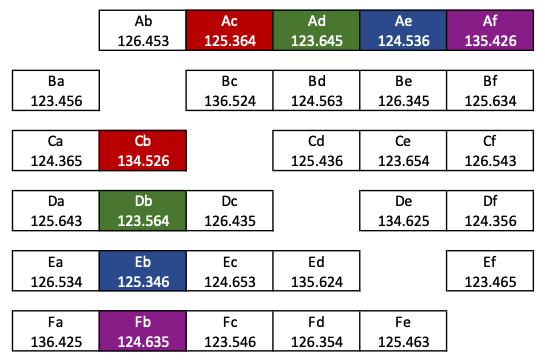

In [3]:
from IPython.display import Image
Image(filename="./ConwaysGrid.png")

In [8]:
C36names={                "Ab": "126.453", "Ac": "125.364", "Ad": "123.645", "Ae": "124.536", "Af": "135.426", 
         "Ba": "123.456",                  "Bc": "136.524", "Bd": "124.563", "Be": "126.345", "Bf": "125.634",
         "Ca": "124.365", "Cb": "134.526",                  "Cd": "125.436", "Ce": "123.654", "Cf": "126.543",
         "Da": "125.643", "Db": "123.564", "Dc": "126.435",                  "De": "134.625", "Df": "124.356",
         "Ea": "126.534", "Eb": "125.346", "Ec": "124.653", "Ed": "135.624",                  "Ef": "123.465",
         "Fa": "136.425", "Fb": "124.635", "Fc": "123.546", "Fd": "126.354", "Fe": "125.463"}

## Functions used to investigate

**UCC**(Target, dictionary_of_cubes):<br>
output: ordered list of cube_name and UCC of cube_name for target

**UCCsublist**(ucc_output, n):<br>
output: the cube names to the target with UCC$\geq n$

In [9]:
UCC(C36["123.456"], C36)


[['123.456', 8],
 ['135.624', 2],
 ['135.426', 2],
 ['134.625', 2],
 ['134.526', 2],
 ['126.543', 2],
 ['126.435', 2],
 ['126.354', 2],
 ['125.463', 2],
 ['125.436', 2],
 ['125.364', 2],
 ['125.346', 2],
 ['124.653', 2],
 ['124.635', 2],
 ['124.536', 2],
 ['124.356', 2],
 ['123.654', 2],
 ['123.645', 2],
 ['123.564', 2],
 ['123.546', 2],
 ['123.465', 2],
 ['136.524', 0],
 ['136.425', 0],
 ['126.534', 0],
 ['126.453', 0],
 ['126.345', 0],
 ['125.643', 0],
 ['125.634', 0],
 ['124.563', 0],
 ['124.365', 0]]

## Functions to find solution numbers

**SolutionFrequencyList**(dictionary_of_cubes, target_cube):
output: after removing cubes with ucc=0, this code displays the number of collections from the subset of cubes that have nonzero ucc. Then returns the number of collections with 0 solutions and a frequency table with 
solution# : #collections (with that solution number)


    

In [11]:
SolutionFrequencyList(C36, C36["123.456"])  #cube Ba in JHC notation

[123, 253, 354, 134, 146, 456, 265, 162] and [152, 124, 143, 135, 365, 346, 264, 256] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [153, 132, 124, 145, 465, 264, 236, 356] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [245, 125, 132, 234, 364, 163, 156, 465] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [152, 135, 345, 254, 246, 364, 163, 126] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 345, 235, 132, 126, 256, 465, 164] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [235, 153, 145, 254, 246, 164, 136, 263] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 154, 245, 234, 263, 256, 165, 136] no intersection
There are 203490 collections to make the target [123, 253, 354, 134, 146, 456, 265

In [11]:
SolutionFrequencyList(C36, C36["134.625"])  #cube  in JHC notation

[153, 235, 243, 134, 146, 264, 256, 165] and [154, 142, 123, 135, 365, 263, 246, 456] no intersection
[153, 235, 243, 134, 146, 264, 256, 165] and [245, 253, 123, 142, 164, 136, 356, 465] no intersection
[153, 235, 243, 134, 146, 264, 256, 165] and [143, 124, 254, 345, 356, 265, 162, 136] no intersection
[153, 235, 243, 134, 146, 264, 256, 165] and [354, 145, 124, 234, 263, 162, 156, 365] no intersection
[153, 235, 243, 134, 146, 264, 256, 165] and [154, 143, 132, 125, 265, 236, 346, 456] no intersection
[153, 235, 243, 134, 146, 264, 256, 165] and [245, 125, 132, 234, 364, 163, 156, 465] no intersection
[153, 235, 243, 134, 146, 264, 256, 165] and [152, 135, 345, 254, 246, 364, 163, 126] no intersection
[153, 235, 243, 134, 146, 264, 256, 165] and [152, 145, 354, 253, 236, 346, 164, 126] no intersection
[153, 235, 243, 134, 146, 264, 256, 165] and [143, 234, 253, 135, 156, 265, 246, 164] no intersection
There are 203490 collections to make the target [153, 235, 243, 134, 146, 264, 256

## 1. Find the 81 collections that attain the maximum solution number of 16.


a collection of  9 cubes
these cubes are Buildable:
['123.456']
the original set of cubes


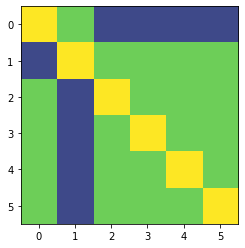

the set of buildable targets


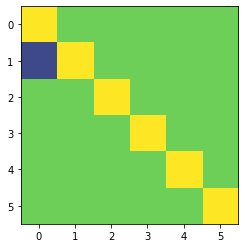

In [12]:
### Here are 9 collections. 

LookingMax=["123.456", "123.645", "135.426","124.536", "125.364", "123.564", "124.635", "125.346","134.526"]
print("a collection of ", len(LookingMax), "cubes")

DisplaySetCubesandBuildableTargets(LookingMax, C36)

a collection of  12 cubes
these 30 cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


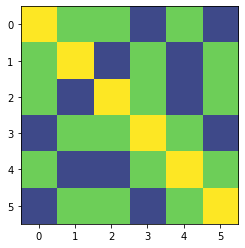

the set of buildable targets


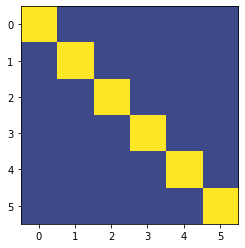

In [17]:
### Here is a collection of 12.  Is it universal? YES!! NEW 1
LookingUkeys=["Ad", "Da", "Af", "Fa", "Df", "Fd", "Be", "Eb",  "Ce", "Ec", "Bc", "Cb" ]
LookingMU=[C36names[key] for key in LookingUkeys]
print("a collection of ", len(LookingMU), "cubes")

DisplaySetCubesandBuildableTargets(LookingMU, C36)

a collection of  12 cubes
these 30 cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


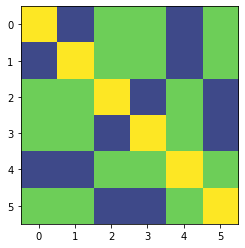

the set of buildable targets


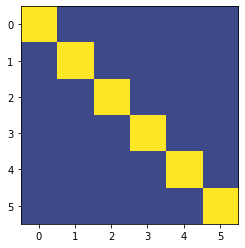

In [25]:
### Here is a collection of 12.  Is it universal? YES!  New 2!
LookingUkeys=["Ab", "Ba", "Ae", "Ea", "Be", "Eb",  "Cd", "Dc", "Cf", "Fc", "Df", "Fd"]
##Here is a third
#LookingUkeys=["Ad", "Da", "Ae", "Ea", "Be", "Eb", "Dc", "Cd", "Cf", "Fc", "Df", "Fd"]
LookingMU=[C36names[key] for key in LookingUkeys]
print("a collection of ", len(LookingMU), "cubes")

DisplaySetCubesandBuildableTargets(LookingMU, C36)

a collection of  12 cubes
these 30 cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


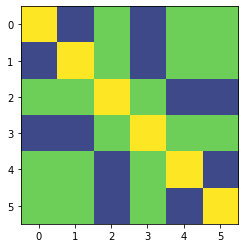

the set of buildable targets


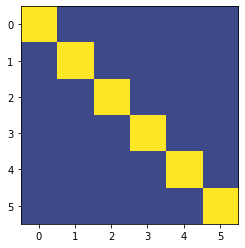

In [22]:
### Here is a collection of 12.  Is it universal? ANOTHER ONE new. Should be two more!
#This makes nine min universal sets.
LookingUkeys=["Ab", "Ba", "Ad", "Da", "Bd", "Db",  "Ce", "Ec", "Cf", "Fc", "Ef", "Fe"]
LookingMU=[C36names[key] for key in LookingUkeys]
print("a collection of ", len(LookingMU), "cubes")

DisplaySetCubesandBuildableTargets(LookingMU, C36)

a collection of  12 cubes
these 30 cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


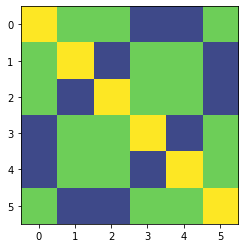

the set of buildable targets


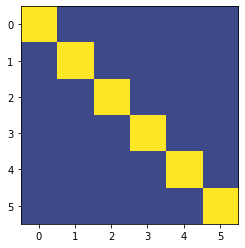

In [19]:
### Here is a collection of 12.  Is it universal? YES!  New 2!
LookingUkeys=["Ad", "Da", "Ae", "Ea", "Bc", "Cb",  "Bf", "Fb", "Cf", "Fc", "De", "Ed"]
LookingMU=[C36names[key] for key in LookingUkeys]
print("a collection of ", len(LookingMU), "cubes")

DisplaySetCubesandBuildableTargets(LookingMU, C36)

a collection of  12 cubes
these 30 cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


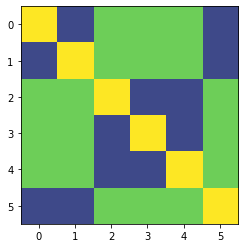

the set of buildable targets


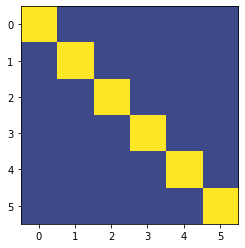

In [27]:
### Here is a collection of 12.  Is it universal? 
LookingUkeys=["Ab", "Ba", "Af", "Fa", "Bf", "Fb",  "Cd", "Dc", "Ce", "Ec", "De", "Ed"]
LookingMU=[C36names[key] for key in LookingUkeys]
print("a collection of ", len(LookingMU), "cubes")

DisplaySetCubesandBuildableTargets(LookingMU, C36)

In [13]:
#Any eight of the following nine cubes gives a solution number of 16. (72 additional collections exist!)

SubDict={key: C36[key] for key in LookingMax}
SolutionFrequencyList(SubDict, C36["123.456"])

There are 9 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
Checked 9 collections of 8 cubes
0 of the collections yield no solutions
 16 :  9


### The first 9 collections
The target and the eight colored diagonal cubes in the figure below form the first nine collections of eight cubes with solution number 16. 
The eight cubes
123.645 and 123.564 are green,
125.364 and 134.526 are red,
135.426 and 124.635 are purple, and 
125.346 and 124.536 blue
create four two cycles in the graph.  A 2-cycle, such as 123.645 and 123.564, can satisfy the pair of corners that their edge is between, such as 123 and 456, in two ways. The cube 123.645 can be placed at corner 123 and 123.564 placed in corner 456, or vice versa. Thus each pair of cubes of the same color (green, red, purple, or blue) contributes a factor of 2 to the solution number giving solution number 16. 


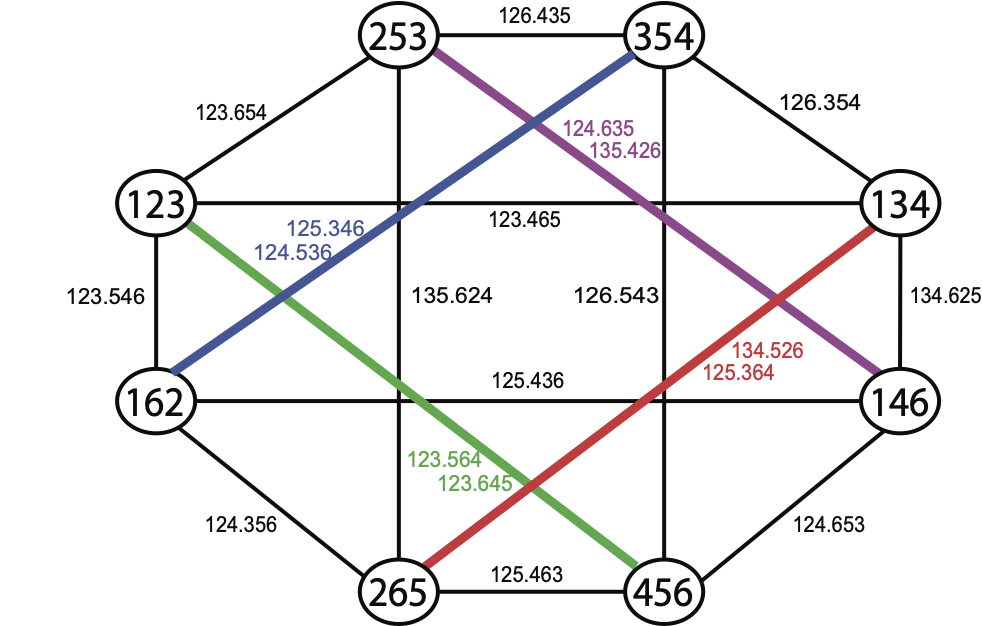

In [16]:
from IPython.display import Image
Image(filename="./C36123456updateALT.png", width="500")

### Several more collections

An example: Consider the collection containing

"123.456" the target, 

"123.645" and "123.564" the two green edges, 

"125.364" and "134.526" the two red edges, 

"135.426" one of the purple edges, 

"125.346" one of the blue edges, and

"126.435" the top black edge in Figure 4.

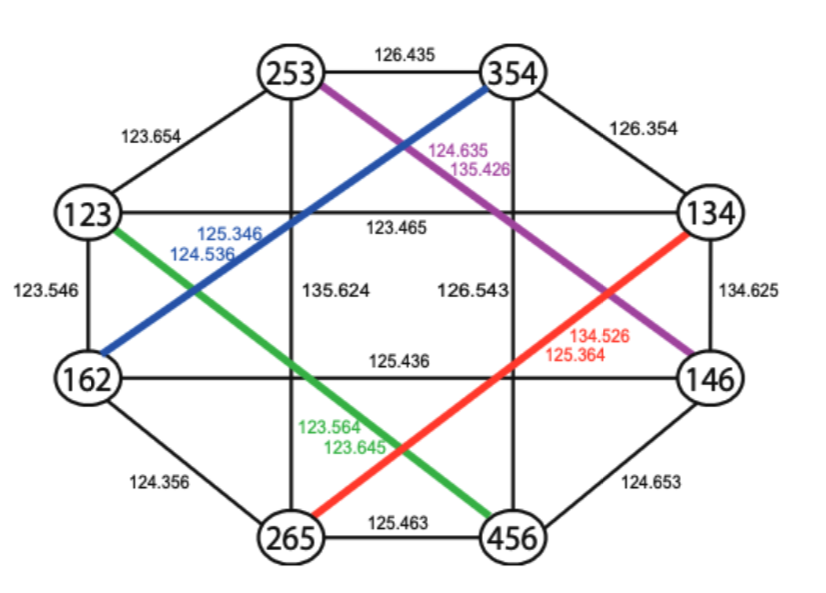

Figure 4. 

The two green edges and the two red edges contribute factors of 2 to the solution number.
The last four cubes span the remaining 4 corners of the target, so placing the target in one of the remaining four corners contributes a factor of 4 to the solution number.  Thus these eight cubes have solution number 16 as well.
Additional collections with solution number 16, that are similar to the example above, can be found with 

two same-colored pairs,

three cubes that span the remaining four corners, and

the target cube.

There are 6 choices for two same-colored pairs. The three cubes that span the remaining four corners can contain either (a) two colored cubes and a black cube or (b) two blacks and a colored. In case (a) there are 8 possible choices and in (b) there are 4 choices.  Thus, we've found an additional 6(8+4)=72 collections of 8 cubes with solution number 16.  This is all of them!!


In [15]:
LookingMin=["126.435", "126.354","123.465","125.463","124.356","125.436","124.635","125.364"]
SubDictMin={key: C36[key] for key in LookingMin}
SolutionFrequencyList(SubDictMin, C36["123.456"])

There are 1 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
Checked 1 collections of 8 cubes
0 of the collections yield no solutions
 2 :  1


In [5]:
LookingIntMatch=["124.635", "135.426", "124.536", "125.346", "125.364", "134.526", "123.645", "123.564"]
SubDictIntMatch={key: C36[key] for key in LookingIntMatch}
SolutionFrequencyList(SubDictIntMatch, C36["123.456"])

There are 1 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
Checked 1 collections of 8 cubes
0 of the collections yield no solutions
 16 :  1


In [6]:
IsThisMaxWInclude=["123.456", "125.364", "134.526", "124.653", "135.426", "123.654", "124.536"]
print(len(IsThisMaxWInclude))

7


In [7]:
dictionary = C36
target = C36["123.456"]

RestrictedSolutionFrequencyList(C36, target, IsThisMaxWInclude)

[123, 253, 354, 134, 146, 456, 265, 162] and [152, 124, 143, 135, 365, 346, 264, 256] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [153, 132, 124, 145, 465, 264, 236, 356] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [245, 125, 132, 234, 364, 163, 156, 465] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [152, 135, 345, 254, 246, 364, 163, 126] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 345, 235, 132, 126, 256, 465, 164] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [235, 153, 145, 254, 246, 164, 136, 263] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 154, 245, 234, 263, 256, 165, 136] no intersection
There are 14 collections to make the target [123, 253, 354, 134, 146, 456, 265, 16

## 2. Other puzzles with these cubes

Given a collection of eight cubes, how many cubes in C36 can be made from the eight in the collection?

In [9]:
InteriorMatchCollection=["123.645", "135.426","124.536", "125.364", "123.564", "124.635", "125.346","134.526"]

SubDict={key: C36[key] for key in InteriorMatchCollection}
for i in keysListC36:
    print(i, SolutionFrequencyList(SubDict, C36[i]))

There are 1 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
 16 :  1
123.456 None
[152, 123, 134, 145, 465, 364, 263, 256] and [245, 154, 135, 253, 236, 163, 146, 264] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [245, 354, 153, 125, 162, 136, 346, 264] no intersection
There are 0 collections to make the target [152, 123, 134, 145, 465, 364, 263, 256]
123.465 None
[123, 243, 345, 135, 156, 465, 264, 162] and [153, 134, 142, 125, 265, 246, 364, 356] no intersection
[123, 243, 345, 135, 156, 465, 264, 162] and [124, 152, 253, 234, 364, 356, 165, 146] no intersection
There are 0 collections to make the target [123, 243, 345, 135, 156, 465, 264, 162]
123.546 None
[154, 142, 123, 135, 365, 263, 246, 456] and [124, 152, 253, 234, 364, 356, 165, 146] no intersection
[154, 142, 123, 135, 365, 263, 246, 456] and [245, 354, 153, 125, 162, 136, 346, 264] no intersection
[154, 142, 123, 135, 365, 263, 246, 456] and [243, 254, 145, 134, 163, 156, 265, 236] no

Consider the collection 
InteriorMatchCollection=["123.645", "135.426","124.536", "125.364", "123.564", "124.635", "125.346","134.526"]
So named because it is the collection for which the interior matching puzzle has a solution (in fact two solutions) for the target 123.456.

For this collection of 8 cubes, the target cube 123.456 is the ONLY model cube in $C_6$ that can be replicated in a 2x2x2 model.

In [14]:
AnotherCollection=["123.645", "123.564", "124.356", "125.436", "124.653", "135.426", "126.453", "136.425"]
SubDict={key: C36[key] for key in AnotherCollection}
for i in keysListC36:
    print(i, SolutionFrequencyList(SubDict, C36[i]))

[123, 253, 354, 134, 146, 456, 265, 162] and [143, 345, 235, 132, 126, 256, 465, 164] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [235, 153, 145, 254, 246, 164, 136, 263] no intersection
There are 0 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
Checked 0 collections of 8 cubes
0 of the collections yield no solutions
123.456 None
[152, 123, 134, 145, 465, 364, 263, 256] and [143, 124, 254, 345, 356, 265, 162, 136] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [124, 132, 235, 254, 456, 365, 163, 146] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [245, 154, 135, 253, 236, 163, 146, 264] no intersection
There are 0 collections to make the target [152, 123, 134, 145, 465, 364, 263, 256]
Checked 0 collections of 8 cubes
0 of the collections yield no solutions
123.465 None
[123, 243, 345, 135, 156, 465, 264, 162] and [124, 132, 235, 254, 456, 365, 163, 146] no intersection
[123, 243, 345, 135, 156, 465, 264, 162] and [23

The collection
AnotherCollection=["123.645", "123.564", "124.356", "125.436", "124.653", "135.426", "126.453", "136.425"]
can be used to build 124.653, with solution number 8, and 126.345 with solution number 2.
## Is there a collection of 8 cubes that can build more than two targets?

We will see the answer is yes!  In fact, 360 collections of 8 cubes can build 5 targets.  No collections can build more than 5 targets.

In [15]:
print(keysListC36)

['123.456', '123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']


Initial results (n=40):
- a collection that cannot be used to build anything in C36  xxxxx|xxxxx|xxxxx|xxxx   (47.5%)
- a collection that can build one cube with 2 solutions  xxxxx|xxxxx                  (25%)
- a collection where two targets can be built (both have solution number 2) xxx       (7.5%)
- a collection where a target is built with solution number 4  x                      (2.5%)
- a collection where a target is built with solution number 2 and another with 8  xx  (5%)
- a collection where a target is built with solution number 8  xxxxx                  (12.5%)


495
('126.453', '125.364', '136.524', '134.526', '134.625', '124.356', '123.465', '135.624')
('126.453', '125.364', '136.524', '134.526', '134.625', '124.356', '125.463', '126.354')
('126.453', '125.364', '136.524', '134.526', '123.465', '125.463', '126.354', '135.624')
('126.453', '125.364', '136.524', '123.456', '134.625', '124.356', '123.465', '125.463')
('126.453', '125.364', '136.524', '123.456', '134.625', '125.463', '126.354', '135.624')
('126.453', '125.364', '136.524', '123.456', '124.356', '123.465', '126.354', '135.624')
('126.453', '125.364', '134.526', '124.365', '134.625', '124.356', '123.465', '125.463')
('126.453', '125.364', '134.526', '124.365', '134.625', '125.463', '126.354', '135.624')
('126.453', '125.364', '134.526', '124.365', '124.356', '123.465', '126.354', '135.624')
('126.453', '134.526', '124.365', '123.456', '134.625', '124.356', '123.465', '135.624')
('126.453', '134.526', '124.365', '123.456', '134.625', '124.356', '125.463', '126.354')
('126.453', '134.

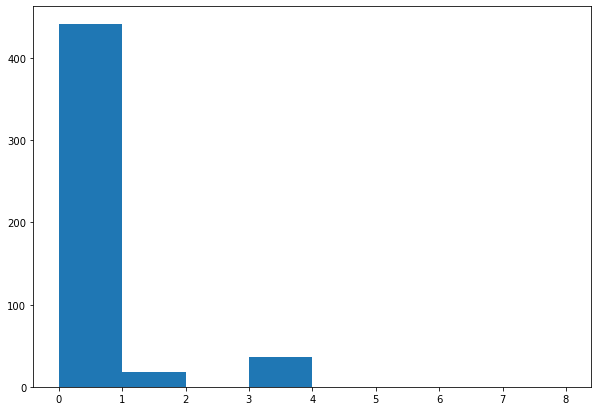

 3 :  36
 1 :  18
 0 :  441


In [3]:
# the 12 universal keys are a known set of cubes 
# from which all 30 cubes in C6 can be built. - reference Haraguchi

import statistics

KeysUniversal=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
SubDictUniversal={key: C36[key] for key in KeysUniversal}

# Creating all collections of eight cubes from KeysUniversal
cube_dictionary = SubDictUniversal.keys()
Collections=list(it.combinations(cube_dictionary, 8))
print(len(Collections))

#Creating the distribution of solution numbers for all collections of 8 cubes from C36
distribution_of_solution_numbers =[] 

#for each collection of 8 cubes, determine the number of cubes that can be built from that collection
for coll in Collections:
    eight_cubes=[C36[key] for key in coll]
    #list of the solution numbers for the cubes in C36
    a_solution_list=[]
    for j in list(C36.keys()):
        a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
    m=CountIfPositive(a_solution_list)
    if m==1:
        print(coll)
    distribution_of_solution_numbers.append(m)


# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(distribution_of_solution_numbers, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8])
 
print(statistics.mean(distribution_of_solution_numbers))

# Show plot
plt.show()

CountFrequency(distribution_of_solution_numbers)


The investigation above shows that in the 495 (12 choose 8) collections of eight cubes from the set of universal cubes there are 
 * 441 collections that cannot build any cube in C6,
 * 18 collections that can be used to build exactly one cube in C6
 * 36 collections that can be used to build exactly 3 distinct cubes in C6.

Since the 12 cubes are a minimal universal set of cubes, all 30 cubes in C6 are buildable from the 18+36=54 collections mentioned above.

In [5]:
#Investigating a collection of 8  from the minimal universal set (studied above) 
# from which three cubes can be built
example_mthree=['126.453', '125.364', '136.524', '134.526', '124.365', '123.456', '134.625', '123.465']
eight_cubes1=[C36[key] for key in example_mthree]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes1, C36[j])))
    
print(a_solution_list)

[0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0]


In [10]:
#Another collection of 8 from the minimal universal set (studied above) 
# from which three cubes can be built
example2_mthree=['126.453', '125.364', '136.524', '134.526', '124.365', '123.456', '134.625', '126.354']
eight_cubes2=[C36[key] for key in example2_mthree]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes2, C36[j])))
    
print(a_solution_list)

[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0]


In [11]:
#Another collection of 8 from the minimal universal set (studied above) 
# from which three cubes can be built
example3_mthree=['126.453', '136.524', '134.526', '124.365', '123.456', '134.625', '123.465', '126.354']
eight_cubes3=[C36[key] for key in example3_mthree]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes3, C36[j])))
    
print(a_solution_list)

[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]


In [9]:
#Another collection of 8 from the minimal universal set (studied above) 
# from which three cubes can be built
example4_mthree=['126.453', '125.364', '136.524', '134.526', '124.365', '123.456', '124.356', '135.624']
eight_cubes3=[C36[key] for key in example4_mthree]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes3, C36[j])))
    
print(a_solution_list)

[0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0]


In [12]:
example5_mthree=['134.526', '123.456', '134.625', '124.356', '123.465', '125.463', '126.354', '135.624']
eight_cubes3=[C36[key] for key in example5_mthree]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes3, C36[j])))
    
print(a_solution_list)


[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0]


In [15]:
ListOfCollectionsFromMinUniversal_three_solutions= [['126.453', '125.364', '136.524', '134.526', '124.365', '123.456', '134.625', '123.465'],
['126.453', '125.364', '136.524', '134.526', '124.365', '123.456', '134.625', '126.354'],
['126.453', '125.364', '136.524', '134.526', '124.365', '123.456', '124.356', '125.463'],
['126.453', '125.364', '136.524', '134.526', '124.365', '123.456', '124.356', '135.624'],
['126.453', '125.364', '136.524', '134.526', '124.365', '123.456', '123.465', '126.354'],
['126.453', '125.364', '136.524', '134.526', '124.365', '123.456', '125.463', '135.624'],
['126.453', '125.364', '136.524', '134.526', '124.365', '134.625', '123.465', '126.354'],
['126.453', '125.364', '136.524', '134.526', '124.365', '124.356', '125.463', '135.624'],
['126.453', '125.364', '136.524', '134.526', '123.456', '134.625', '123.465', '126.354'],
['126.453', '125.364', '136.524', '134.526', '123.456', '124.356', '125.463', '135.624'],
['126.453', '125.364', '136.524', '124.365', '123.456', '134.625', '123.465', '126.354'],
['126.453', '125.364', '136.524', '124.365', '123.456', '124.356', '125.463', '135.624'],
['126.453', '125.364', '134.526', '124.365', '123.456', '134.625', '123.465', '126.354'],
['126.453', '125.364', '134.526', '124.365', '123.456', '124.356', '125.463', '135.624'],
['126.453', '136.524', '134.526', '124.365', '123.456', '134.625', '123.465', '126.354'],
['126.453', '136.524', '134.526', '124.365', '123.456', '124.356', '125.463', '135.624'],
['126.453', '136.524', '124.365', '134.625', '124.356', '123.465', '125.463', '126.354'],
['126.453', '136.524', '124.365', '134.625', '124.356', '123.465', '125.463', '135.624'],
['126.453', '136.524', '124.365', '134.625', '124.356', '123.465', '126.354', '135.624'],
['126.453', '136.524', '124.365', '134.625', '124.356', '125.463', '126.354', '135.624'],
['126.453', '136.524', '124.365', '134.625', '123.465', '125.463', '126.354', '135.624'],
['126.453', '136.524', '124.365', '124.356', '123.465', '125.463', '126.354', '135.624'],
['126.453', '136.524', '134.625', '124.356', '123.465', '125.463', '126.354', '135.624'],
['126.453', '124.365', '134.625', '124.356', '123.465', '125.463', '126.354', '135.624'],
['125.364', '136.524', '134.526', '124.365', '123.456', '134.625', '123.465', '126.354'],
['125.364', '136.524', '134.526', '124.365', '123.456', '124.356', '125.463', '135.624'],
['125.364', '134.526', '123.456', '134.625', '124.356', '123.465', '125.463', '126.354'],
['125.364', '134.526', '123.456', '134.625', '124.356', '123.465', '125.463', '135.624'],
['125.364', '134.526', '123.456', '134.625', '124.356', '123.465', '126.354', '135.624'],
['125.364', '134.526', '123.456', '134.625', '124.356', '125.463', '126.354', '135.624'],
['125.364', '134.526', '123.456', '134.625', '123.465', '125.463', '126.354', '135.624'],
['125.364', '134.526', '123.456', '124.356', '123.465', '125.463', '126.354', '135.624'],
['125.364', '134.526', '134.625', '124.356', '123.465', '125.463', '126.354', '135.624'],
['125.364', '123.456', '134.625', '124.356', '123.465', '125.463', '126.354', '135.624'],
['136.524', '124.365', '134.625', '124.356', '123.465', '125.463', '126.354', '135.624'],
['134.526', '123.456', '134.625', '124.356', '123.465', '125.463', '126.354', '135.624']]

for coll in ListOfCollectionsFromMinUniversal_three_solutions:
    eight_cubes3=[C36[key] for key in coll]

    a_solution_list=[]
    for j in list(C36.keys()): 
        a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes3, C36[j])))
    
    print(a_solution_list)
    

[0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0]
[0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]

In [19]:
ListOfCollectionsFromMinUniversal_one_solution=[['126.453', '125.364', '136.524', '134.526', '134.625', '124.356', '123.465', '135.624'],
['126.453', '125.364', '136.524', '134.526', '134.625', '124.356', '125.463', '126.354'],
['126.453', '125.364', '136.524', '134.526', '123.465', '125.463', '126.354', '135.624'],
['126.453', '125.364', '136.524', '123.456', '134.625', '124.356', '123.465', '125.463'],
['126.453', '125.364', '136.524', '123.456', '134.625', '125.463', '126.354', '135.624'],
['126.453', '125.364', '136.524', '123.456', '124.356', '123.465', '126.354', '135.624'],
['126.453', '125.364', '134.526', '124.365', '134.625', '124.356', '123.465', '125.463'],
['126.453', '125.364', '134.526', '124.365', '134.625', '125.463', '126.354', '135.624'],
['126.453', '125.364', '134.526', '124.365', '124.356', '123.465', '126.354', '135.624'],
['126.453', '134.526', '124.365', '123.456', '134.625', '124.356', '123.465', '135.624'],
['126.453', '134.526', '124.365', '123.456', '134.625', '124.356', '125.463', '126.354'],
['126.453', '134.526', '124.365', '123.456', '123.465', '125.463', '126.354', '135.624'],
['125.364', '136.524', '124.365', '123.456', '134.625', '124.356', '123.465', '135.624'],
['125.364', '136.524', '124.365', '123.456', '134.625', '124.356', '125.463', '126.354'],
['125.364', '136.524', '124.365', '123.456', '123.465', '125.463', '126.354', '135.624'],
['136.524', '134.526', '124.365', '123.456', '134.625', '124.356', '123.465', '125.463'],
['136.524', '134.526', '124.365', '123.456', '134.625', '125.463', '126.354', '135.624'],
['136.524', '134.526', '124.365', '123.456', '124.356', '123.465', '126.354', '135.624']]

for coll in ListOfCollectionsFromMinUniversal_one_solution:
    eight_cubes3=[C36[key] for key in coll]

    a_solution_list=[]
    for j in list(C36.keys()): 
        a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes3, C36[j])))
    
    print(a_solution_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Summary:  Of the 495 collections of 8 cubes from Haraguchi's set, 
* 18 collections have 1 buildable cube with solution number 4
* 36 collections have 3 buildable cubes. In 12 collections the solution numbers 8, 8, and 2 and in the remaining 24 collections the solution numbers are 2, 2, and 2
* 441 of the collections build 0 cubes

What about subsets of 9, 10, 11 cubes from Haraguchi's set?  We know from studying collections of 8 cubes, at most 3 cubes are buildable.  If we look at ALL 12 cubes from Haraguchi's set, all 30 cubes in C6 are buildable.  What is the max number of buildable cubes for subsets of 9, 10, and 11?  How do we transition from building at most 3 to building all 30?

220
0.24545454545454545


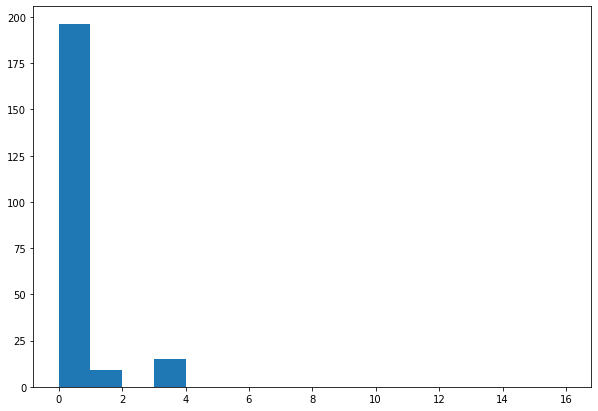

 3 :  15
 1 :  9
 0 :  196


In [4]:
# the 12 universal keys are a known set of cubes 
# from which all 30 cubes in C6 can be built. - reference Haraguchi

import statistics

KeysUniversal=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
SubDictUniversal={key: C36[key] for key in KeysUniversal}

# Creating all collections of nine cubes from KeysUniversal
cube_dictionary = SubDictUniversal.keys()
Collections=list(it.combinations(cube_dictionary, 9))
print(len(Collections))

#Creating the distribution of solution numbers for all collections of 9 cubes from C36
distribution_of_solution_numbers =[] 

#for each collection of 9 cubes, determine the number of cubes that can be built from that collection
for coll in Collections:
    nine_cubes=[C36[key] for key in coll]
    #list of the solution numbers for the cubes in C36
    a_solution_list=[]
    for j in list(C36.keys()):
        a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
    m=CountIfPositive(a_solution_list)
    if m==1:
        print(coll)
    distribution_of_solution_numbers.append(m)


# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(distribution_of_solution_numbers, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
 
print(statistics.mean(distribution_of_solution_numbers))

# Show plot
plt.show()

CountFrequency(distribution_of_solution_numbers)



these cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


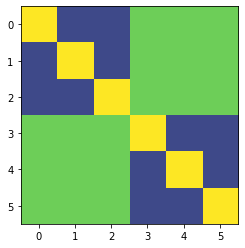

the set of buildable targets


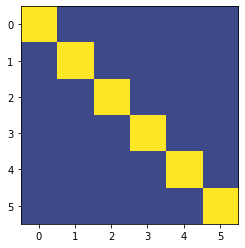

In [17]:
KeysUniversal=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
DisplaySetCubesandBuildableTargets(KeysUniversal, C36)

In [10]:
#dictionary_of_cubes, such as C36, C35, ...    
def RandomEightCubes(dictionary_of_cubes): 
    allkeysList = list(dictionary_of_cubes.keys())
    Number=len(allkeysList)
    x=random.sample(range(Number), 8)
    cube_names=[]
    collection=[]
    
    for i in x:
        cube_names.append(keysListC36[i])
    
    for j in cube_names:
        collection.append(C36[j])
        
    return collection
    
#Given a dictionary of cubes, this function gives a random collection of 8 cubes.    
RandomEightCubes(C36)

[[153, 354, 234, 132, 126, 246, 456, 165],
 [143, 154, 245, 234, 263, 256, 165, 136],
 [153, 132, 124, 145, 465, 264, 236, 356],
 [153, 134, 142, 125, 265, 246, 364, 356],
 [243, 254, 145, 134, 163, 156, 265, 236],
 [243, 123, 152, 254, 456, 165, 136, 346],
 [123, 243, 345, 135, 156, 465, 264, 162],
 [123, 253, 354, 134, 146, 456, 265, 162]]

In [12]:
a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(RandomEightCubes(C36), C36[j])))
    
print(a_solution_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]


0.6856


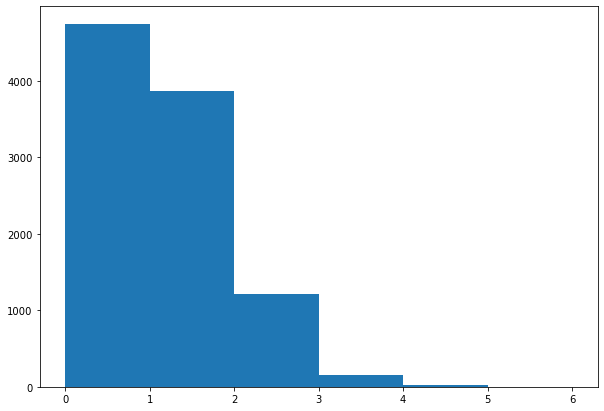

 5 :  1
 4 :  21
 3 :  159
 2 :  1212
 1 :  3866
 0 :  4741


In [3]:
import statistics

# Creating data
a = DistributionRandomCollectionsHowManyTargetsCanBeBuilt(C36,10000)

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, 1, 2, 3, 4, 5, 6])
 
print(statistics.mean(a))
# Show plot
plt.show()

CountFrequency(a)

0.68745


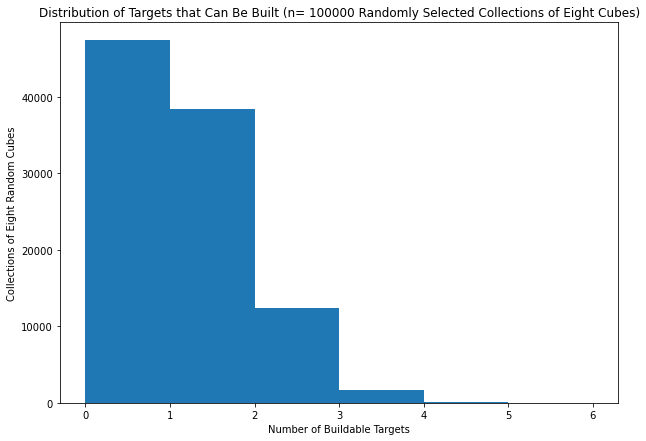

 5 :  6
 4 :  166
 3 :  1611
 2 :  12407
 1 :  38404
 0 :  47406


In [11]:
# Creating dataset
a = DistributionHowManyTargetsCanBeBuilt(C36,100000)

print(statistics.mean(a))

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, 1, 2, 3, 4, 5, 6])
 
# Adding extra features   
plt.xlabel("Number of Buildable Targets")
plt.ylabel("Collections of Eight Random Cubes")
#plt.legend(legend)
plt.title('Distribution of Targets that Can Be Built (n= 100000 Randomly Selected Collections of Eight Cubes)')    
    
# Show plot
plt.show()

CountFrequency(a)

In [4]:
#Note: this code is now in module 2x2x2 ext match
def SolnDistrib_AllCollectionsEightCubes(dictionary_for_collections, dictionary_for_targets): 
    keysList_collections = list(dictionary_for_collections.keys())
    keysList_targets = list(dictionary_for_targets.keys())
    #make a list of all collections of 8. For C6 there are 5852925 such collections.
    #output: a list of keys
    Collections=list(it.combinations(keysList_collections, 8))
    #distribution_positives=[]
    No_targets_built=0
    One_target_built=0
    Two_targets_built=0
    Three_targets_built=0
    Four_targets_built=0
    Five_targets_built=0
    SixPlus_targets_built=0
    
    for coll in Collections:
        eight_cubes=[dictionary_for_collections[key] for key in coll]
        
        a_solution_list=[]DistribOfNumBuildable_AllCollectionsEightCubes
        for j in keysList_targets:
            a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, dictionary_for_targets[j])))
    
        b=CountIfPositive(a_solution_list)
        
        if b==0:
            No_targets_built = No_targets_built+1
        
        if b==1:
            One_target_built = One_target_built+1
        
        if b==2:
            Two_targets_built = Two_targets_built+1
        
        if b==3:
            Three_targets_built = Three_targets_built+1
            
        if b==4:
            Four_targets_built = Four_targets_built+1
            
        if b==5: 
            Five_targets_built = Five_targets_built+1
            print(coll)
            print(a_solution_list)
            
        if b>5:
            SixPlus_targets_built = SixPlus_targets_built+1
            
    TargetBuild_distribution=[No_targets_built, One_target_built, Two_targets_built, Three_targets_built, Four_targets_built, Five_targets_built, SixPlus_targets_built]
    

    return TargetBuild_distribution

#****

Some collections of eight cubes in C6 can be used to build five distinct cubes in C6.  Which collections are these?  Why are there only 5 or so collections?



In [8]:
KeysUniversal=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
SubDictUniversal={key: C36[key] for key in KeysUniversal}

DistribOfNumBuildable_AllCollectionsEightCubes(SubDictUniversal, C36)

        

[441, 18, 0, 36, 0, 0, 0]

key list 
['123.456', '123.465', '123.546', '123.564', '123.645', 
'123.654', '124.356', '124.365', '124.536', '124.563', 
'124.635', '124.653', '125.346', '125.364', '125.436', 
'125.463', '125.634', '125.643', '126.345', '126.354', 
'126.435', '126.453', '126.534', '126.543', '134.526', 
'134.625', '135.426', '135.624', '136.425', '136.524']

Another example:
'123.654', '124.563', '125.436', '125.643', '126.345', '126.534', '134.625', '135.624')
[0, 0, 2, 0, 0, 
0, 0, 0, 0, 0, 
2, 0, 0, 4, 0, 
0, 0, 0, 0, 0, 
0, 4, 0, 0, 0, 
0, 4, 0, 0, 0]


Another example:
'123.564', '123.645', '124.563', '126.345', '126.435', '126.453', '134.625', '136.524'
[0, 2, 0, 0, 0, 
0, 0, 4, 0, 0, 
0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 
0, 0, 4, 2, 0, 
0, 0, 0, 4, 0]


example, first w/o 123.456:
'123.465', '123.546', '123.564', '124.356', '124.635', '125.346', '125.634', '136.524')
[0, 0, 0, 0, 2, 
4, 0, 4, 2, 0, 
0, 0, 0, 0, 4, 
0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 
0, 0, 0, 0, 0]


example 15:
collection:'123.456', '123.546', '123.645', '124.365', '125.364', '125.436', '136.425', '136.524')
[0, 2, 0, 4, 0, 
0, 4, 0, 0, 0, 
0, 0, 2, 0, 0, 
0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 
4, 0, 0, 0, 0]

example 7:
collection: '123.456', '123.465', '123.654', '124.365', '124.536', '126.345', '126.534', '135.426'
[0, 0, 4, 2, 0, 
0, 0, 0, 0, 0, 
4, 0, 0, 0, 0, 
0, 0, 0, 0, 4, 
2, 0, 0, 0, 0, 
0, 0, 0, 0, 0]


example 2:
collection: '123.456', '123.465', '123.546', '125.364', '125.634', '126.534', '135.426', '136.425'
[0, 0, 0, 2, 0, 
4, 0, 0, 0, 0, 
0, 0, 0, 0, 4, 
0, 0, 0, 0, 0, 
0, 0, 0, 0, 4, 
2, 0, 0, 0, 0]


example 1:
collection: '123.456', '123.465', '123.546', '124.635', '125.346', '125.634', '136.425', '136.524'
[0, 0, 0, 0, 2, 
4, 0, 0, 4, 0, 
0, 0, 0, 0, 2, 
0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 
4, 0, 0, 0, 0]

In [9]:
DistribOfNumBuildable_AllCollectionsEightCubes(C36, C36)

('123.456', '123.465', '123.546', '124.635', '125.346', '125.634', '136.425', '136.524')
[0, 0, 0, 0, 2, 4, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0]
('123.456', '123.465', '123.546', '125.364', '125.634', '126.534', '135.426', '136.425')
[0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0]
('123.456', '123.465', '123.564', '124.356', '124.635', '125.346', '125.634', '136.425')
[0, 0, 0, 0, 4, 2, 0, 0, 4, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.465', '123.564', '125.346', '125.634', '126.345', '126.534', '134.625')
[0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.465', '123.645', '124.536', '126.345', '126.534', '135.426', '135.624')
[0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0]
('123.456', '123.465', '123.645', '125.634', '126.354', '126.534', '135.426', '136.425')
[0, 0, 0, 4

('123.456', '123.564', '125.346', '125.634', '125.643', '126.453', '126.534', '135.426')
[0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.564', '125.364', '125.634', '125.643', '126.453', '135.426', '136.524')
[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0]
('123.456', '123.645', '123.654', '124.365', '124.536', '125.364', '125.436', '136.524')
[0, 2, 0, 4, 0, 0, 2, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.645', '123.654', '124.365', '124.536', '126.345', '126.534', '135.624')
[0, 0, 2, 4, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.645', '124.356', '124.365', '124.563', '125.436', '125.643', '135.426')
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.645', '124.356', '124.536', '124.563', '125.643', '134.625', '135.426')
[0, 0, 2, 0

('123.456', '124.635', '124.653', '125.346', '125.463', '126.345', '126.534', '136.524')
[0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0]
('123.456', '124.635', '125.346', '125.364', '126.453', '126.534', '136.425', '136.524')
[0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0]
('123.456', '124.635', '125.463', '125.634', '126.345', '126.543', '134.526', '136.425')
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0]
('123.456', '125.346', '125.364', '125.634', '126.453', '126.534', '135.426', '136.524')
[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0]
('123.465', '123.546', '123.564', '124.356', '124.635', '125.346', '125.634', '136.524')
[0, 0, 0, 0, 2, 4, 0, 4, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.465', '123.546', '123.564', '124.356', '124.635', '126.354', '126.435', '135.624')
[2, 0, 0, 0

('123.465', '123.654', '124.356', '124.563', '125.436', '126.345', '134.625', '135.624')
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0]
('123.465', '123.654', '124.356', '124.635', '125.346', '125.463', '126.543', '134.625')
[4, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
('123.465', '123.654', '124.356', '125.436', '125.643', '126.534', '134.625', '135.624')
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4]
('123.465', '123.654', '124.356', '125.463', '126.534', '126.543', '134.625', '136.425')
[0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2]
('123.465', '123.654', '124.365', '124.536', '125.346', '126.453', '126.534', '135.426')
[0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4]
('123.465', '123.654', '124.365', '124.536', '125.643', '126.534', '134.625', '135.426')
[0, 0, 4, 0

('123.546', '123.564', '124.356', '124.635', '125.463', '125.634', '126.345', '136.524')
[0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0]
('123.546', '123.564', '124.356', '124.635', '125.634', '126.453', '135.426', '136.524')
[0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0]
('123.546', '123.564', '124.365', '125.436', '125.643', '126.354', '126.435', '134.526')
[0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0]
('123.546', '123.564', '124.653', '125.436', '126.354', '126.435', '134.526', '135.624')
[4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
('123.546', '123.645', '123.654', '124.365', '124.536', '125.364', '125.436', '136.425')
[0, 4, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.546', '123.645', '123.654', '125.364', '125.436', '126.354', '126.435', '134.625')
[2, 4, 0, 0

('123.546', '124.563', '124.635', '124.653', '125.346', '125.436', '134.526', '136.524')
[0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0]
('123.546', '124.563', '124.635', '125.364', '125.436', '126.453', '134.526', '136.524')
[0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0]
('123.546', '124.563', '124.635', '125.634', '126.354', '126.453', '135.426', '136.524')
[0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0]
('123.546', '124.635', '125.364', '125.436', '126.354', '126.543', '134.526', '135.426')
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0]
('123.546', '124.635', '125.463', '125.634', '126.345', '126.453', '135.426', '136.524')
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0]
('123.546', '125.364', '125.436', '125.634', '126.354', '126.543', '135.426', '136.524')
[0, 0, 0, 4

('123.564', '124.563', '124.635', '125.346', '126.354', '126.435', '135.624', '136.524')
[0, 0, 0, 0, 0, 4, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0]
('123.564', '124.563', '124.635', '125.436', '126.345', '126.354', '134.526', '134.625')
[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0]
('123.564', '124.563', '124.635', '126.345', '126.354', '126.435', '134.625', '136.524')
[0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 4, 0, 0, 0]
('123.564', '124.635', '124.653', '125.346', '125.463', '126.345', '134.625', '136.524')
[0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0]
('123.564', '124.653', '125.346', '125.463', '126.354', '126.435', '134.625', '135.624')
[2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0]
('123.564', '124.653', '125.346', '125.634', '126.435', '126.543', '134.526', '136.524')
[0, 0, 0, 0

('123.654', '125.364', '125.634', '126.345', '126.453', '126.543', '134.526', '136.524')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 4, 0, 0, 0, 0, 2, 4, 0]
('123.654', '125.436', '125.463', '125.643', '126.354', '126.534', '134.625', '135.624')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 2]
('124.356', '124.365', '124.536', '125.463', '125.643', '126.543', '135.426', '136.425')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2]
('124.356', '124.365', '124.563', '125.436', '125.643', '126.435', '126.543', '136.524')
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0]
('124.356', '124.365', '124.635', '125.643', '126.453', '126.543', '135.426', '136.425')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4]
('124.356', '124.365', '124.653', '125.436', '125.643', '126.435', '126.543', '135.624')
[0, 0, 0, 0

[2774940, 2256390, 720405, 91920, 8910, 360, 0]

In [41]:
#old function name (poorly named!)
#name changed to DistribOfNumBuildable_AllCollectionsEightCubes
SolnDistrib_AllCollectionsEightCubes(C36, C36)

('123.456', '123.465', '123.546', '124.635', '125.346', '125.634', '136.425', '136.524')
[0, 0, 0, 0, 2, 4, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0]
('123.456', '123.465', '123.546', '125.364', '125.634', '126.534', '135.426', '136.425')
[0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0]
('123.456', '123.465', '123.564', '124.356', '124.635', '125.346', '125.634', '136.425')
[0, 0, 0, 0, 4, 2, 0, 0, 4, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.465', '123.564', '125.346', '125.634', '126.345', '126.534', '134.625')
[0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.465', '123.645', '124.536', '126.345', '126.534', '135.426', '135.624')
[0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0]
('123.456', '123.465', '123.645', '125.634', '126.354', '126.534', '135.426', '136.425')
[0, 0, 0, 4

('123.456', '123.564', '125.346', '125.634', '125.643', '126.453', '126.534', '135.426')
[0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.564', '125.364', '125.634', '125.643', '126.453', '135.426', '136.524')
[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0]
('123.456', '123.645', '123.654', '124.365', '124.536', '125.364', '125.436', '136.524')
[0, 2, 0, 4, 0, 0, 2, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.645', '123.654', '124.365', '124.536', '126.345', '126.534', '135.624')
[0, 0, 2, 4, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.645', '124.356', '124.365', '124.563', '125.436', '125.643', '135.426')
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.456', '123.645', '124.356', '124.536', '124.563', '125.643', '134.625', '135.426')
[0, 0, 2, 0

('123.456', '124.635', '124.653', '125.346', '125.463', '126.345', '126.534', '136.524')
[0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0]
('123.456', '124.635', '125.346', '125.364', '126.453', '126.534', '136.425', '136.524')
[0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0]
('123.456', '124.635', '125.463', '125.634', '126.345', '126.543', '134.526', '136.425')
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0]
('123.456', '125.346', '125.364', '125.634', '126.453', '126.534', '135.426', '136.524')
[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0]
('123.465', '123.546', '123.564', '124.356', '124.635', '125.346', '125.634', '136.524')
[0, 0, 0, 0, 2, 4, 0, 4, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.465', '123.546', '123.564', '124.356', '124.635', '126.354', '126.435', '135.624')
[2, 0, 0, 0

('123.465', '123.654', '124.356', '124.563', '125.436', '126.345', '134.625', '135.624')
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0]
('123.465', '123.654', '124.356', '124.635', '125.346', '125.463', '126.543', '134.625')
[4, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
('123.465', '123.654', '124.356', '125.436', '125.643', '126.534', '134.625', '135.624')
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4]
('123.465', '123.654', '124.356', '125.463', '126.534', '126.543', '134.625', '136.425')
[0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2]
('123.465', '123.654', '124.365', '124.536', '125.346', '126.453', '126.534', '135.426')
[0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4]
('123.465', '123.654', '124.365', '124.536', '125.643', '126.534', '134.625', '135.426')
[0, 0, 4, 0

('123.546', '123.564', '124.356', '124.635', '125.463', '125.634', '126.345', '136.524')
[0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0]
('123.546', '123.564', '124.356', '124.635', '125.634', '126.453', '135.426', '136.524')
[0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0]
('123.546', '123.564', '124.365', '125.436', '125.643', '126.354', '126.435', '134.526')
[0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0]
('123.546', '123.564', '124.653', '125.436', '126.354', '126.435', '134.526', '135.624')
[4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
('123.546', '123.645', '123.654', '124.365', '124.536', '125.364', '125.436', '136.425')
[0, 4, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('123.546', '123.645', '123.654', '125.364', '125.436', '126.354', '126.435', '134.625')
[2, 4, 0, 0

('123.546', '124.563', '124.635', '124.653', '125.346', '125.436', '134.526', '136.524')
[0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0]
('123.546', '124.563', '124.635', '125.364', '125.436', '126.453', '134.526', '136.524')
[0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0]
('123.546', '124.563', '124.635', '125.634', '126.354', '126.453', '135.426', '136.524')
[0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0]
('123.546', '124.635', '125.364', '125.436', '126.354', '126.543', '134.526', '135.426')
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0]
('123.546', '124.635', '125.463', '125.634', '126.345', '126.453', '135.426', '136.524')
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0]
('123.546', '125.364', '125.436', '125.634', '126.354', '126.543', '135.426', '136.524')
[0, 0, 0, 4

('123.564', '124.563', '124.635', '125.346', '126.354', '126.435', '135.624', '136.524')
[0, 0, 0, 0, 0, 4, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0]
('123.564', '124.563', '124.635', '125.436', '126.345', '126.354', '134.526', '134.625')
[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0]
('123.564', '124.563', '124.635', '126.345', '126.354', '126.435', '134.625', '136.524')
[0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 4, 0, 0, 0]
('123.564', '124.635', '124.653', '125.346', '125.463', '126.345', '134.625', '136.524')
[0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0]
('123.564', '124.653', '125.346', '125.463', '126.354', '126.435', '134.625', '135.624')
[2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0]
('123.564', '124.653', '125.346', '125.634', '126.435', '126.543', '134.526', '136.524')
[0, 0, 0, 0

('123.654', '125.364', '125.634', '126.345', '126.453', '126.543', '134.526', '136.524')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 4, 0, 0, 0, 0, 2, 4, 0]
('123.654', '125.436', '125.463', '125.643', '126.354', '126.534', '134.625', '135.624')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 2]
('124.356', '124.365', '124.536', '125.463', '125.643', '126.543', '135.426', '136.425')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2]
('124.356', '124.365', '124.563', '125.436', '125.643', '126.435', '126.543', '136.524')
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0]
('124.356', '124.365', '124.635', '125.643', '126.453', '126.543', '135.426', '136.425')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4]
('124.356', '124.365', '124.653', '125.436', '125.643', '126.435', '126.543', '135.624')
[0, 0, 0, 0

[2774940, 2256390, 720405, 91920, 8910, 360, 0]

## Distribution of the number of buildable cubes 
### for all 5852925 collections of eight cubes from C6.

NumberOfBuildableCubes : NumberOfCollections 

0: 2774940  47.41%

1: 2256390  38.55%

2:  720405  12.308%
         
3:   91920   1.57%
         
4:    8910   0.15%
         
5:     360   0.0000615%
         
6+:      0   0%

Kazuya Haraguchi found a collection of 12 cubes from which all cubes of C6 can be built using various subsets of 8 cubes. He also proved that this subset is Minimal, meaning for any subset of C6 containing 11 cubes there will be at least one cube in C6 that cannot be built from the set.
Haraguchi's 12 cubes are 
"126.453", "125.364", "136.524", "134.526", "124.365", "123.456", 
"134.625", "124.356", "123.465", "125.463", "126.354", "135.624".
Or as depicted in Conway's Tableu the are the cubes arranged as follows:

    x 1 1 0 0 0
    1 x 1 0 0 0
    1 1 x 0 0 0
    0 0 0 x 1 1
    0 0 0 1 x 1
    0 0 0 1 1 x

Key: 1 is a cube in the collection, 0 is a cube is not in the collection, x indicates an empty square in the tableau. We will call this collection Haraguchi's set of 12.
As seen above, in random collections of 8 from Haraguchi's set of 12
approximately 

* 47% yeild no solution for every cube in C6
* 38% yeild a solution for one cube in C6
* 12% yeild a solution for two cubes in C6
* 1.5% yeild a solution for three cubes in C6
* 0.15% yeild a solution for four cubes in C6
* 0.005% yeild a solution for 5 cubes in C6.
              
Currently, no collections have been found that yield solutions for 6 or more cubes from C6
              

In [ ]:
KeysUniversal=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]



## Investigations to describe the 360 collections of 8 cubes in C6 that can be used to build 5 distinct targets.

In [42]:
#Looking for collections for 5 buildable cubes from C6. YES! 5 cubes can be built
ListOfKeys = ['123.456', '126.453', '125.364', '136.524', '125.643','123.564', '126.534', '125.346']
eight_cubes=[C36[key] for key in ListOfKeys]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
print(a_solution_list)




[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0]


In [43]:
#Looking for collections for 5 buildable cubes from C6. Another collection for 5 buildables
#this collection has 6 cubes in common with previous example.
ListOfKeys = ['123.456', '126.453', '125.643','123.564', '126.534', '125.346', '135.426', '125.634']
eight_cubes=[C36[key] for key in ListOfKeys]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
print(a_solution_list)

[0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [44]:
#Looking for collections for 5 buildable cubes from C6. YES! 5 cubes can be built
ListOfKeys = ['123.456', '126.453', '125.364', '136.524', '126.534', '125.346', '136.425', '124.635']
eight_cubes=[C36[key] for key in ListOfKeys]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
print(a_solution_list)

[0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0]


In [46]:
#Looking for collections for 5 buildable cubes from C6. #Looking for collections for 5 buildable cubes from C6. 
ListOfKeys = ['123.456', '126.453', '126.534', '125.346', '136.425', '124.635', '123.645', '124.563']
eight_cubes=[C36[key] for key in ListOfKeys]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
print(a_solution_list)

[0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 4, 0, 0, 0, 0]


In [47]:
#Looking for collections for 5 buildable cubes from C6. #cannot build 5 targets!! BUILDS FOUR TARGETS!
ListOfKeys = ['123.456', '126.453', '126.534', '125.346', '136.425', '124.635', '124.536', '126.345']
eight_cubes=[C36[key] for key in ListOfKeys]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
print(a_solution_list)

[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0]


In [48]:
#Looking for collections for 5 buildable cubes from C6. YES! 5 cubes can be built
#.               Ba         Ab          Ac         Bc         Da       Db           Fa        Fb
ListOfKeys = ['123.456', '126.453', '125.364', '136.524', '125.643','123.564', '136.425', '124.635']
eight_cubes=[C36[key] for key in ListOfKeys]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
print(a_solution_list)

[0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0]


In [49]:
#Looking for collections for 5 buildable cubes from C6. #cannot build 5 targets!! BUILDS FOUR TARGETS!
#.               Ba         Ab          Da       Db           Fa        Fb
ListOfKeys = ['123.456', '126.453', '125.643','123.564', '136.425', '124.635', '123.645', '124.563']
eight_cubes=[C36[key] for key in ListOfKeys]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
print(a_solution_list)

[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]


In [50]:
#Looking for collections for 5 buildable cubes from C6. YES! 5 cubes can be built
#.               Ba         Ab          Da       Db           Fa        Fb
ListOfKeys = ['123.456', '126.453', '125.643','123.564', '136.425', '124.635', '124.536', '126.345']
eight_cubes=[C36[key] for key in ListOfKeys]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
print(a_solution_list)

[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0]


In [51]:
#Looking for collections for 5 buildable cubes from C6. Only THREE buildable targets. Not sure why not 4 targets?
#.               Ba         Ab          
ListOfKeys = ['123.456', '126.453', '124.365', '126.534', '125.346', '135.426', '125.634', '126.543']
eight_cubes=[C36[key] for key in ListOfKeys]

a_solution_list=[]
for j in list(C36.keys()): 
    a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
print(a_solution_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]


### Observations when looking for collections that can build 5 targets

Conjectures:
* There are two types of collections.  Type I has 8 cubes in exactly three columns (distributed 3-3-2) and exactly four rows (distributed 2-2-2-2). Type II has 8 cubes in exactly three rows (distributed 3-3-2) and exactly four columns (distributed 2-2-2-2).
* In the intersection of rows and columns that contain no collection cubes, there must be exactly 5 cubes.  The mirror cubes of these 5 cubes cannot be in the collection. The five cubes contain no mirror pair.
* The collection must contain exactly one mirror pair. (or at least one?)

In [27]:
#Looking at Haraguchi's Universal
#Universal Instances

KeysUniversal=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
SubDictUniversal={key: C36[key] for key in KeysUniversal}

for j in list(C36.keys()): 
    print(j)
    SolutionFrequencyList(SubDictUniversal, C36[j])

123.456
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 345, 235, 132, 126, 256, 465, 164] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 154, 245, 234, 263, 256, 165, 136] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [152, 124, 143, 135, 365, 346, 264, 256] no intersection
There are 9 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
 8 :  2
 2 :  7
123.465
[152, 123, 134, 145, 465, 364, 263, 256] and [143, 124, 254, 345, 356, 265, 162, 136] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [154, 143, 132, 125, 265, 236, 346, 456] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [143, 234, 253, 135, 156, 265, 246, 164] no intersection
There are 9 collections to make the target [152, 123, 134, 145, 465, 364, 263, 256]
 8 :  2
 2 :  7
123.546
[123, 243, 345, 135, 156, 465, 264, 162] and [153, 134, 142, 125, 265, 246, 364, 356] no intersection
[123, 243, 345, 135, 156, 465, 264, 162] and [143, 154, 245, 2

As mentioned above, given the 12 Haraguchi cubes every cube in C_6 can be made.  However, there are two scenarios depending on whether the target is in or not in Haraguchi's set.  

* For the 12 targets in Haraguchi's set, exactly three cubes from Haraguchi's set have no corner numbers in commond with the target cube. These  three cubes include the target's mirror cube, the cube in the same row as the target, and the cube in the same column as the target.  In this case, there remain 9 cubes and hence 9 collections to build the target.  Two of those collections have solution number 8 and seven of the collections have solution number 2.  
* For the remaining 18 target cubes in C_6, there are exactly four universal cubes that have no intersection with the target cube.  In this case, there is one remaining collection to build the target and that collection has solution number 4. 

In [4]:
#More Universal Collections?? YES!  Min Universal Set2
#Try these keys, these are torus shifted versions of Haraguchi's example.  Conjecture: (haven't checked all three) There are a total of 3 collections of 12 cubes that form a universal instance.

#x 0 0 0 1 1
#0 x 1 1 0 0
#0 1 x 1 0 0
#0 1 1 x 0 0
#1 0 0 0 x 1
#1 0 0 0 1 x

MaybeKeysUniversal=["136.524", "124.563", "125.436", "126.435", "123.564", "134.526", "123.465", "126.534", "136.425", "125.463", "124.536", "135.426"]
SubDictUniversal={key: C36[key] for key in MaybeKeysUniversal}

for j in list(C36.keys()): 
    print(j)
    SolutionFrequencyList(SubDictUniversal, C36[j])
        

123.456
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 154, 245, 234, 263, 256, 165, 136] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [153, 132, 124, 145, 465, 264, 236, 356] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [235, 153, 145, 254, 246, 164, 136, 263] no intersection
There are 1 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
 4 :  1
123.465
[152, 123, 134, 145, 465, 364, 263, 256] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [154, 143, 132, 125, 265, 236, 346, 456] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [245, 154, 135, 253, 236, 163, 146, 264] no intersection
There are 9 collections to make the target [152, 123, 134, 145, 465, 364, 263, 256]
 8 :  2
 2 :  7
123.546
[123, 243, 345, 135, 156, 465, 264, 162] and [143, 154, 245, 234, 263,

In [3]:
#Are there more Universal Collections??  Min Universal Set 3
#Looking at collections of 12 with torus shifted version of Haraguchi's 
#Try these keys, 
#x 1 0 0 0 1
#1 x 0 0 0 1
#0 0 x 1 1 0
#0 0 1 x 1 0
#0 0 1 1 x 0
#1 1 0 0 0 x

MaybeKeysUniversal2=["123.456", "126.453", "135.426", "125.634", "125.436", "123.654", "126.435", "134.625", "124.653", "135.624", "136.425", "124.635"]
SubDictUniversal2={key: C36[key] for key in MaybeKeysUniversal2}

for j in list(C36.keys()): 
    print(j)
    SolutionFrequencyList(SubDictUniversal2, C36[j])

123.456
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 345, 235, 132, 126, 256, 465, 164] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [235, 153, 145, 254, 246, 164, 136, 263] no intersection
There are 9 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
 8 :  2
 2 :  7
123.465
[152, 123, 134, 145, 465, 364, 263, 256] and [245, 154, 135, 253, 236, 163, 146, 264] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [124, 132, 235, 254, 456, 365, 163, 146] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [143, 234, 253, 135, 156, 265, 246, 164] no intersection
There are 1 collections to make the target [152, 123, 134, 145, 465, 364, 263, 256]
 4 :  1
123.546
[123, 243, 345, 135, 156, 465, 264, 162] and [152, 145, 354, 253, 236,

In [6]:
#Is this a MinUniversal set? The set is symmetric across XXs. Nope
# x 0 1 0 0 1
# 0 x 0 1 1 0
# 1 0 x 0 1 0
# 0 1 0 x 0 1
# 0 1 1 0 x 0
# 1 0 0 1 0 x

MaybeKeysUniversal4=["125.364", "135.426", "124.563", "126.345", "124.365", "123.654", "123.564", "124.356", "125.346", "124.653", "136.425", "126.354"]
SubDictUniversal4={key: C36[key] for key in MaybeKeysUniversal4}

for j in list(C36.keys()): 
    print(j)
    print(SolutionFrequencyList(SubDictUniversal4, C36[j]))

123.456
[123, 253, 354, 134, 146, 456, 265, 162] and [153, 132, 124, 145, 465, 264, 236, 356] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [152, 135, 345, 254, 246, 364, 163, 126] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [152, 124, 143, 135, 365, 346, 264, 256] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [235, 153, 145, 254, 246, 164, 136, 263] no intersection
There are 1 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
 4 :  1
None
123.465
[152, 123, 134, 145, 465, 364, 263, 256] and [245, 154, 135, 253, 236, 163, 146, 264] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [143, 124, 254, 345, 356, 265, 162, 136] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [245, 354, 153, 125, 162, 136, 346, 264] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [124, 132, 235, 254, 456, 365, 163, 146] no intersection
There are 1 collections to make the target [152, 123, 134, 145, 465, 36

In [7]:
#Is this a MinUniversal set? NOPE! The set is symmetric across XXs. maybe dual to Haraguchi
# x 0 0 0 1 1 
# 0 x 0 1 0 1
# 0 0 x 1 1 0
# 0 1 1 x 0 0
# 1 0 1 0 x 0
# 1 1 0 0 0 x

MaybeKeysUniversal5=["124.536", "135.426", "124.563", "125.634", "125.436", "123.654", "123.564", "126.435", "126.534", "124.653", "136.425", "124.635"]
SubDictUniversal5={key: C36[key] for key in MaybeKeysUniversal5}

for j in list(C36.keys()): 
    print(j)
    print(SolutionFrequencyList(SubDictUniversal5, C36[j]))

123.456
[123, 253, 354, 134, 146, 456, 265, 162] and [153, 132, 124, 145, 465, 264, 236, 356] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [235, 153, 145, 254, 246, 164, 136, 263] no intersection
There are 1 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
None
123.465
[152, 123, 134, 145, 465, 364, 263, 256] and [245, 154, 135, 253, 236, 163, 146, 264] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [124, 132, 235, 254, 456, 365, 163, 146] no intersection
There are 1 collections to make the target [152, 123, 134, 145, 465, 364, 263, 

In [8]:
#Is this a MinUniversal set? NOPE!!  The set is symmetric across XXs. 
# x 0 1 0 1 0
# 0 x 1 1 0 0
# 1 1 x 0 0 0
# 0 1 0 x 0 1
# 1 0 0 0 x 1
# 0 0 0 1 1 x

MaybeKeysUniversal6=["125.364", "124.536", "136.524", "124.563", "124.365", "134.526", "123.564", "124.356", "126.534", "123.465", "126.354", "125.463"]
SubDictUniversal6={key: C36[key] for key in MaybeKeysUniversal6}

for j in list(C36.keys()): 
    print(j)
    print(SolutionFrequencyList(SubDictUniversal6, C36[j]))

123.456
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 154, 245, 234, 263, 256, 165, 136] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [153, 132, 124, 145, 465, 264, 236, 356] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [152, 124, 143, 135, 365, 346, 264, 256] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
There are 1 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
None
123.465
[152, 123, 134, 145, 465, 364, 263, 256] and [143, 124, 254, 345, 356, 265, 162, 136] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [154, 143, 132, 125, 265, 236, 346, 456] no intersection
There are 9 collections to make the target [152, 123, 134, 145, 465, 364, 263, 256]
 8 :  4
 2 :  5
None
123.546
[123, 243, 345, 135, 156, 465, 264, 162] and [153, 134, 142, 125, 26

In [7]:
#This collection isn't a shifted version of Haraguchi's min universal instance, but is symmetric in the tableau
#Are there more Universal Collections?? This is NOT a universal collection.
#Looking at collections of 12 with two cubes selected from each row and column of Conway's tableau 
#Try these keys, 
MaybeKeysUniversal3=["123.645", "124.536", "136.524", "126.345", "134.526", "126.543", "125.643", "124.356", "126.534", "125.346", "123.546", "126.354"]
SubDictUniversal3={key: C36[key] for key in MaybeKeysUniversal3}

for j in list(C36.keys()): 
    print(j)
    print(SolutionFrequencyList(SubDictUniversal3, C36[j]))

123.456
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 154, 245, 234, 263, 256, 165, 136] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [152, 135, 345, 254, 246, 364, 163, 126] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [245, 125, 132, 234, 364, 163, 156, 465] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
There are 1 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
None
123.465
[152, 123, 134, 145, 465, 364, 263, 256] and [153, 354, 234, 132, 126, 246, 456, 165] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [143, 124, 254, 345, 356, 265, 162, 136] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [245, 354, 153, 125, 162, 136, 346, 264] no intersection
There are 1 collections to make the target [152, 123, 134, 145, 465, 364, 263, 

In [16]:
#Are these a universal collection of 12 cubes? Nope.
#Looking at collections of 12 with two cubes selected from each row and column of Conway's tableau 
#Try these keys, 
MaybeKeysUniversal3=["124.536", "135.426", "124.563", "125.634", "125.436", "123.654", "123.564", "126.435", "126.534", "124.653", "136.425", "124.635"]
SubDictUniversal3={key: C36[key] for key in MaybeKeysUniversal3}

for j in list(C36.keys()): 
    print(j)
    print(SolutionFrequencyList(SubDictUniversal3, C36[j]))
    

123.456
[123, 253, 354, 134, 146, 456, 265, 162] and [153, 132, 124, 145, 465, 264, 236, 356] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [235, 153, 145, 254, 246, 164, 136, 263] no intersection
There are 1 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
None
123.465
[152, 123, 134, 145, 465, 364, 263, 256] and [245, 154, 135, 253, 236, 163, 146, 264] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [124, 132, 235, 254, 456, 365, 163, 146] no intersection
There are 1 collections to make the target [152, 123, 134, 145, 465, 364, 263, 

In [17]:
#Are these a universal collection of 12 cubes? NO!
# 00xx00
# 000x0x
# x000x0
# xx0000
# 00x00x
# 0x00x0 (selected cubes from tableau)
#Looking at collections of 12 with two cubes selected from each row and column of Conway's tableau 
#Try these keys, 
MaybeKeysUniversal3=["125.364", "123.645", "124.563", "125.634", "124.365", "123.654", "124.653", "123.465", "124.635", "125.463"]
SubDictUniversal3={key: C36[key] for key in MaybeKeysUniversal3}

for j in list(C36.keys()): 
    print(j)
    print(SolutionFrequencyList(SubDictUniversal3, C36[j]))
    

123.456
[123, 253, 354, 134, 146, 456, 265, 162] and [153, 132, 124, 145, 465, 264, 236, 356] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [152, 124, 143, 135, 365, 346, 264, 256] no intersection
There are 0 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
None
123.465
[152, 123, 134, 145, 465, 364, 263, 256] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [124, 132, 235, 254, 456, 365, 163, 146] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [154, 143, 132, 125, 265, 236, 346, 456] no intersection
There are 0 collections to make the target [152, 123, 134, 145, 465, 364, 263, 256]
None
123.546
[123, 243, 345, 135, 156, 465, 264, 162] and [153, 134, 142, 125, 265, 246, 364, 356] no intersection
[123, 243, 345, 135, 156, 465, 264, 162] and [124, 132, 235, 254, 456, 365, 163, 146

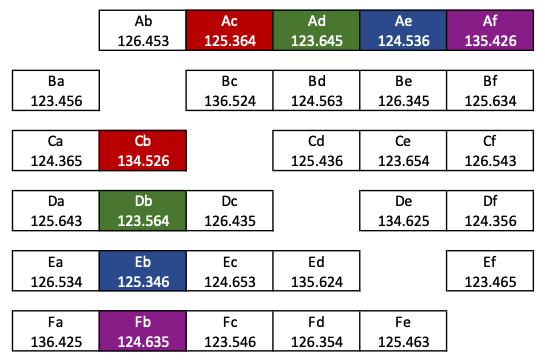

In [2]:
from IPython.display import Image
Image(filename="./ConwaysGrid.png")

In [19]:
EightC = [C36["126.435"], C36["124.635"], C36["126.354"], C36["123.465"], C36["134.526"], C36["125.436"], C36["124.356"], C36["125.463"]]
Target = C36["123.456"]
CornerCountVector(EightC, Target)

[[123, 1, [7]],
 [253, 2, [2, 3]],
 [354, 2, [2, 5]],
 [134, 3, [5, 7, 11]],
 [146, 2, [3, 13]],
 [456, 1, [19]],
 [265, 3, [11, 17, 19]],
 [162, 2, [13, 17]]]

In [32]:
a0=300
a1=45
a2=12
a3=14
a4=23
a5=1
a6=1

x1=[0, 1, 2, 3, 4, 5, 6]
x2=[a0, a1, a2, a3, a4, a5, a6]
print(x2)

# Creating histogram
vals, bins = np.histogram(x1, bins=7, weights=x2)



[300, 45, 12, 14, 23, 1, 1]


In [8]:
#Note: this code is now in module 2x2x2 ext match
def SolnDistrib_AllCollectionsEightCubes(dictionary_for_collections, dictionary_for_targets): 
    keysList_collections = list(dictionary_for_collections.keys())
    keysList_targets = list(dictionary_for_targets.keys())
    #make a list of all collections of 8. For C6 there are 5852925 such collections.
    #output: a list of keys
    Collections=list(it.combinations(keysList_collections, 8))
    #distribution_positives=[]
    No_targets_built=0
    One_target_built=0
    Two_targets_built=0
    Three_targets_built=0
    Four_targets_built=0
    Five_targets_built=0
    SixPlus_targets_built=0
    
    for coll in Collections:
        eight_cubes=[dictionary_for_collections[key] for key in coll]
        
        a_solution_list=[]
        for j in keysList_targets:
            a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, dictionary_for_targets[j])))
    
        b=CountIfPositive(a_solution_list)
        
        if b==0:
            No_targets_built = No_targets_built+1
        
        if b==1:
            One_target_built = One_target_built+1
        
        if b==2:
            Two_targets_built = Two_targets_built+1
        
        if b==3:
            Three_targets_built = Three_targets_built+1
            
        if b==4:
            Four_targets_built = Four_targets_built+1
            
        if b==5: 
            Five_targets_built = Five_targets_built+1
            print(coll)
            print(a_solution_list)
            
        if b>5:
            SixPlus_targets_built = SixPlus_targets_built+1
            
    TargetBuild_distribution=[No_targets_built, One_target_built, Two_targets_built, Three_targets_built, Four_targets_built, Five_targets_built, SixPlus_targets_built]
    

    return TargetBuild_distribution

#****

In [9]:
KeysHaraguchi=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
SubDictHaraguchi={key: C36[key] for key in KeysHaraguchi}

SolnDistrib_AllCollectionsEightCubes(SubDictHaraguchi, C36)


[441, 18, 0, 36, 0, 0, 0]

In [88]:
import numpy as np

KeysHaraguchi=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
#SubDictHaraguchi={key: C36[key] for key in KeysHaraguchi}

keysList_collections = KeysHaraguchi
keysList_targets = list(C36.keys())
    
SetsOfTen=list(it.combinations(keysList_collections, 10))

n=len(SetsOfTen)

print("there are", n, "sets of 10 cubes")

list_buildable_counts=[]

for i in range(66):
    current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    Collections=list(it.combinations(SetsOfTen[i], 8))
    
    for coll in Collections:
        solution_list_for_coll=[]
        eight_cubes=[C36[key] for key in coll]

        for j in keysList_targets:
            solution_list_for_coll.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
            
        #print(solution_list_for_coll)
        newarray = np.array([k for k in solution_list_for_coll ])
        current_solution_array = current_solution_array + newarray
        
    Number_buildable_cubes = np.count_nonzero(current_solution_array)     
    print(Number_buildable_cubes, current_solution_array)
    list_buildable_counts.append(Number_buildable_cubes)

print(CountFrequency(list_buildable_counts))
    

there are 66 sets of 10 cubes
9 [0 8 0 0 4 0 8 0 0 4 0 0 0 0 4 8 0 0 0 2 0 0 0 0 0 8 0 2 0 0]
3 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0
  0 30  0  0  0  0]
9 [0 8 4 0 0 0 8 0 0 0 4 0 0 0 0 2 0 0 0 2 0 0 0 0 0 8 0 8 4 0]
9 [0 2 0 0 0 0 8 0 0 0 0 4 4 0 0 8 0 0 0 8 0 0 4 0 0 8 0 2 0 0]
3 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0
  0  0  0 30  0  0]
6 [0 2 0 0 0 0 8 0 0 0 0 0 0 0 0 2 0 0 0 8 0 0 0 0 0 8 0 8 0 0]
3 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0
  0 30  0  0  0  0]
6 [0 8 0 0 0 0 2 0 0 0 0 0 0 0 0 8 0 0 0 2 0 0 0 0 0 8 0 8 0 0]
3 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0
  0 30  0  0  0  0]
9 [0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 8 4 0 0 8 0 0 0 4 0 8 4 8 0 0]
6 [0 8 0 0 0 0 8 0 0 0 0 0 0 0 0 8 0 0 0 8 0 0 0 0 0 2 0 2 0 0]
3 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0
  0  0  0 30  0  0]
9 [0 8 0 0 0 4 8 0 4 0 0 0 0 0 0 2 0 0 4 8 0 0 

In [89]:
import numpy as np

KeysHaraguchi=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
#SubDictHaraguchi={key: C36[key] for key in KeysHaraguchi}

keysList_collections = KeysHaraguchi
keysList_targets = list(C36.keys())
    
SetsOfNine=list(it.combinations(keysList_collections, 9))
#distribution_positives=[]
No_targets_built=0
One_target_built=0
Two_targets_built=0
Three_targets_built=0
Four_targets_built=0
Five_targets_built=0
Six_targets_built=0
Seven_targets_built=0
Eight_targets_built=0
Nine_targets_built=0
Ten_targets_built=0
Eleven_targets_built=0
Twelve_targets_built=0
Thirteen_targets_built=0
Fourteen_targets_built=0
Fifteen_targets_built=0
SixteenPlus_targets_built=0   
    
n=len(SetsOfNine)

print("there are", n, "sets of nine cubes")

list_buildable_counts=[]

for i in range(n):
    current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    Collections=list(it.combinations(SetsOfNine[i], 8))
    
    for coll in Collections:
        solution_list_for_coll=[]
        eight_cubes=[C36[key] for key in coll]

        for j in keysList_targets:
            solution_list_for_coll.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
            
        #print(solution_list_for_coll)
        newarray = np.array([k for k in solution_list_for_coll ])
        current_solution_array = current_solution_array + newarray
        
    Number_buildable_cubes = np.count_nonzero(current_solution_array)     
    print(Number_buildable_cubes, current_solution_array)
    list_buildable_counts.append(Number_buildable_cubes)

print(CountFrequency(list_buildable_counts))

there are 220 sets of nine cubes
3 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 8 0 0 0 0]
3 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
3 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0]
3 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
3 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 8 0 0 0 0]
3 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0
  0 30  0  0  0  0]
3 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 8 0 0 0 0]
3 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0]
3 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
3 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0]
3 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
3 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 2 0 0 0 0]
3 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
3 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
3 [ 0  0  0  0  0  0 30  0  0  0  0  0  

3 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2]
3 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2]
3 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2]
3 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2]
3 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
3 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 8]
3 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2]
3 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2]
3 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2]
3 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0

In [91]:
import numpy as np

KeysHaraguchi=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
#SubDictHaraguchi={key: C36[key] for key in KeysHaraguchi}

keysList_collections = KeysHaraguchi
keysList_targets = list(C36.keys())
    
SetsOfEleven=list(it.combinations(keysList_collections, 11))
#distribution_positives=[]
No_targets_built=0
One_target_built=0
Two_targets_built=0
Three_targets_built=0
Four_targets_built=0
Five_targets_built=0
Six_targets_built=0
Seven_targets_built=0
Eight_targets_built=0
Nine_targets_built=0
Ten_targets_built=0
Eleven_targets_built=0
Twelve_targets_built=0
Thirteen_targets_built=0
Fourteen_targets_built=0
Fifteen_targets_built=0
SixteenPlus_targets_built=0   
    
n=len(SetsOfEleven)

print("there are", n, "sets of eleven cubes")

list_buildable_counts=[]

for i in range(n):
    current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    Collections=list(it.combinations(SetsOfEleven[i], 8))
    
    for coll in Collections:
        solution_list_for_coll=[]
        eight_cubes=[C36[key] for key in coll]

        for j in keysList_targets:
            solution_list_for_coll.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
            
        #print(solution_list_for_coll)
        newarray = np.array([k for k in solution_list_for_coll ])
        current_solution_array = current_solution_array + newarray
        
    Number_buildable_cubes = np.count_nonzero(current_solution_array)     
    print(Number_buildable_cubes, current_solution_array)
    list_buildable_counts.append(Number_buildable_cubes)

print(CountFrequency(list_buildable_counts))

there are 12 sets of eleven cubes
18 [ 2 30  0  0  4  0  8  2  0  4  0  4  4  2  4  8  0  0  0 30  0  2  4  0
  2 30  0  2  0  2]
18 [ 2  8  4  0  4  0 30  2  0  4  4  0  0  2  4 30  0  0  0  2  0  2  0  0
  2  8  0 30  4  2]
18 [ 2 30  4  0  0  4  8  2  4  0  4  0  0  2  0  2  0  0  4 30  0  2  0  0
  2 30  0  8  4  2]
18 [ 2  2  0  0  0  0 30  2  0  0  0  4  4  2  0 30  4  0  0  8  0  2  4  4
  2  8  4 30  0  2]
18 [ 2 30  0  4  0  0  2  2  0  0  0  0  0  2  0  8  4  4  0 30  4  2  0  4
  2 30  4  8  0  2]
18 [ 2  8  0  4  0  4 30  2  4  0  0  0  0  2  0 30  0  4  4  8  4  2  0  0
  2  2  0 30  0  2]
18 [ 2  2  0  0  0  0  2 30  0  4  0  0  0  8  0  2  4  4  4  2  0 30  4  0
  8  2  0  2  4 30]
18 [30  2  0  0  0  4  2  2  0  0  0  0  0 30  4  2  0  4  0  2  0  8  4  4
 30  2  0  2  4  8]
18 [ 8  2  0  4  0  4  2 30  0  0  4  0  4  8  4  2  0  0  0  2  0 30  0  4
  2  2  0  2  0 30]
18 [30  2  4  0  0  0  2  8  0  4  0  4  0 30  0  2  4  0  4  2  4  8  0  0
 30  2  0  2  0  2]
18 [ 8

In [4]:
import numpy as np

KeysHaraguchi=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
#SubDictHaraguchi={key: C36[key] for key in KeysHaraguchi}

keysList_collections = KeysHaraguchi
keysList_targets = list(C36.keys())
    
SetsOfTwelve=list(it.combinations(keysList_collections, 12))
#distribution_positives=[]
No_targets_built=0
One_target_built=0
Two_targets_built=0
Three_targets_built=0
Four_targets_built=0
Five_targets_built=0
Six_targets_built=0
Seven_targets_built=0
Eight_targets_built=0
Nine_targets_built=0
Ten_targets_built=0
Eleven_targets_built=0
Twelve_targets_built=0
Thirteen_targets_built=0
Fourteen_targets_built=0
Fifteen_targets_built=0
SixteenPlus_targets_built=0   
    
n=len(SetsOfTwelve)

print("there are", n, "sets of twelve cubes")

list_buildable_counts=[]

for i in range(n):
    current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    Collections=list(it.combinations(SetsOfTwelve[i], 8))
    
    for coll in Collections:
        solution_list_for_coll=[]
        eight_cubes=[C36[key] for key in coll]

        for j in keysList_targets:
            solution_list_for_coll.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
            
        #print(solution_list_for_coll)
        newarray = np.array([k for k in solution_list_for_coll ])
        current_solution_array = current_solution_array + newarray
        
    Number_buildable_cubes = np.count_nonzero(current_solution_array)     
    print(Number_buildable_cubes, current_solution_array)
    list_buildable_counts.append(Number_buildable_cubes)

print(CountFrequency(list_buildable_counts))

there are 1 sets of twelve cubes
30 [30 30  4  4  4  4 30 30  4  4  4  4  4 30  4 30  4  4  4 30  4 30  4  4
 30 30  4 30  4 30]
 30 :  1
None


In [3]:
def Distribution4NumberBuildableCubes(dictionary_sets, dictionary_targets, set_size):
    keysList_targets = list(dictionary_targets.keys())
    keysList_sets = list(dictionary_sets.keys())
    
    SetsOfSizeN=list(it.combinations(keysList_sets, set_size))
    n=len(SetsOfSizeN)

    print("there are", n, "sets of", set_size, "cubes")
    
    list_buildable_counts=[]
    for i in range(n):
        current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        Collections=list(it.combinations(SetsOfSizeN[i], 8))
    
        for coll in Collections:
            solution_list_for_coll=[]
            eight_cubes=[C36[key] for key in coll]

            for j in keysList_targets:
                solution_list_for_coll.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
            
            #print(solution_list_for_coll)
            newarray = np.array([k for k in solution_list_for_coll ])
            current_solution_array = current_solution_array + newarray
        
        Number_buildable_cubes = np.count_nonzero(current_solution_array)     
        #print(Number_buildable_cubes, current_solution_array)
        list_buildable_counts.append(Number_buildable_cubes)

    return CountFrequency(list_buildable_counts)

In [4]:
KeysHaraguchi=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
SubDictHaraguchi={key: C36[key] for key in KeysHaraguchi}


Distribution4NumberBuildableCubes(SubDictHaraguchi, C36, 12)

Distribution4NumberBuildableCubes(SubDictHaraguchi, C36, 11)

Distribution4NumberBuildableCubes(SubDictHaraguchi, C36, 10)

Distribution4NumberBuildableCubes(SubDictHaraguchi, C36, 9)

Distribution4NumberBuildableCubes(SubDictHaraguchi, C36, 8)

there are 1 sets of 12 cubes
 30 :  1
there are 12 sets of 11 cubes
 18 :  12
there are 66 sets of 10 cubes
 9 :  12
 8 :  36
 6 :  6
 3 :  12
there are 220 sets of 9 cubes
 3 :  112
 1 :  72
 0 :  36
there are 495 sets of 8 cubes
 3 :  36
 1 :  18
 0 :  441


In [ ]:
#there are 5852925 sets of 8 cubes in C36.... code taking too long (3 days)
Distribution4NumberBuildableCubes(C36, C36, 8)

In [7]:
#Input: dictionary_of_cubes, such as C36, C35, ...
#Output: a randomly selected collection of k cubes from the dictionary
## format of output, a list [[corner numbers cube 1], [corner numbers cube 2], ... , [corner numbers cube 8]]
def RandomKCubes(dictionary_of_cubes, k): 
    #a list of all dictionary keys, length of the list
    allkeysList = list(dictionary_of_cubes.keys())
    Number=len(allkeysList)
    
    #a random sample of k numbers from a range of 0-Number
    x=random.sample(range(Number), k)
    cube_names=[]
    collection=[]
    
    for i in x:
        cube_names.append(allkeysList[i])
    
    for j in cube_names:
        collection.append(dictionary_of_cubes[j])   
        
    return collection


In [8]:
RandomKCubes(C36, 10)

[[152, 124, 143, 135, 365, 346, 264, 256],
 [152, 123, 134, 145, 465, 364, 263, 256],
 [243, 254, 145, 134, 163, 156, 265, 236],
 [123, 243, 345, 135, 156, 465, 264, 162],
 [243, 123, 152, 254, 456, 165, 136, 346],
 [143, 234, 253, 135, 156, 265, 246, 164],
 [153, 134, 142, 125, 265, 246, 364, 356],
 [245, 125, 132, 234, 364, 163, 156, 465],
 [152, 145, 354, 253, 236, 346, 164, 126],
 [354, 145, 124, 234, 263, 162, 156, 365]]

In [23]:

#Inputs: dictionary of cubes to use, size k of the subset of distinct cubes
#for each set of k, calculate how many cubes in the dictionary can be built
#display the distribution of number of buildable cubes over many random samples of k cubes
def DistributionHowManyTargetsBuiltRANDSAMPk(dictionary_of_cubes, set_size_k, number_of_sets):
    keysList = list(dictionary_of_cubes.keys())
    distribution_positives=[]
    
    #for each in number_of_sets, create a random set_size_k
    #create a list of all subsets of size 8 from a random set_size_k
    for j in range(number_of_sets):
        ASetSizeK = RandomKCubes(dictionary_of_cubes, set_size_k)
         #create list of all collections of 8 cubes
        Collections=list(it.combinations(ASetSizeK, 8))
        n=len(Collections)
        #initialize a list of buildable counts for this set of size k
        list_buildable_counts=[]
        
        #loop over all n collections of size 8
        for m in range(n):
            solution4acolletion=[]
            current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        
            for i in keysList: 
                solution4acolletion.append(CountingSolutions(CornerCountVector(Collections[m], dictionary_of_cubes[i])))
                
            newarray = np.array([w for w in solution4acolletion])
        current_solution_array = current_solution_array + newarray
        
        Number_buildable_cubes = np.count_nonzero(current_solution_array)     
        print(Number_buildable_cubes, current_solution_array)
    list_buildable_counts.append(Number_buildable_cubes)

       
    return CountFrequency(list_buildable_counts)
    

In [22]:
DistributionHowManyTargetsCanBeBuiltRANDSAMPk(C36, 8, 20)

0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 12  0  0  0  0  0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
1 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
1 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
1 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 

In [26]:
for i in range(10):
    for j in range(3):
        j=j+i
        print(j)
    print('meep')

0
1
2
meep
1
2
3
meep
2
3
4
meep
3
4
5
meep
4
5
6
meep
5
6
7
meep
6
7
8
meep
7
8
9
meep
8
9
10
meep
9
10
11
meep


In [38]:
#Test
KeysHaraguchi=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
CubesHaraguchi=[]
for key in KeysHaraguchi:
     CubesHaraguchi.append(C36[key]) 
        
print(CubesHaraguchi)

ASetSizeK = CubesHaraguchi
#create list of all collections of 8 cubes
Collections=list(it.combinations(ASetSizeK, 8))
n=len(Collections)

print('there are', n ,'collections to check')
       
#initialize a list of buildable counts for this set of size k
list_buildable_counts=[]
        
        #loop over all n collections of size 8
for m in range(n):
    solution4acolletion=[]
    current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        
    for key in C36: 
        solution4acolletion.append(CountingSolutions(CornerCountVector(Collections[m], C36[i])))
                
    newarray = np.array([w for w in solution4acolletion])
    current_solution_array = current_solution_array + newarray
        
    Number_buildable_cubes = np.count_nonzero(current_solution_array)
    
    print(Number_buildable_cubes, current_solution_array)
    list_buildable_counts.append(Number_buildable_cubes)

       
print(CountFrequency(list_buildable_counts))
    

[[143, 345, 235, 132, 126, 256, 465, 164], [153, 134, 142, 125, 265, 246, 364, 356], [143, 154, 245, 234, 263, 256, 165, 136], [243, 254, 145, 134, 163, 156, 265, 236], [152, 124, 143, 135, 365, 346, 264, 256], [123, 253, 354, 134, 146, 456, 265, 162], [153, 235, 243, 134, 146, 264, 256, 165], [143, 124, 254, 345, 356, 265, 162, 136], [152, 123, 134, 145, 465, 364, 263, 256], [154, 143, 132, 125, 265, 236, 346, 456], [354, 245, 142, 134, 163, 126, 256, 365], [143, 234, 253, 135, 156, 265, 246, 164]]
there are 495 collections to check
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
30 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
0 [0 0 0 0 

0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [41]:
HaraguchiDict = {key: C36[key] for key in KeysHaraguchi}
AllKeys = C36.keys()
for j in AllKeys:
    print(SolutionFrequencyList(HaraguchiDict, C36[j]))

[123, 253, 354, 134, 146, 456, 265, 162] and [143, 345, 235, 132, 126, 256, 465, 164] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 154, 245, 234, 263, 256, 165, 136] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [152, 124, 143, 135, 365, 346, 264, 256] no intersection
There are 9 collections to make the target [123, 253, 354, 134, 146, 456, 265, 162]
 8 :  2
 2 :  7
None
[152, 123, 134, 145, 465, 364, 263, 256] and [143, 124, 254, 345, 356, 265, 162, 136] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [154, 143, 132, 125, 265, 236, 346, 456] no intersection
[152, 123, 134, 145, 465, 364, 263, 256] and [143, 234, 253, 135, 156, 265, 246, 164] no intersection
There are 9 collections to make the target [152, 123, 134, 145, 465, 364, 263, 256]
 8 :  2
 2 :  7
None
[123, 243, 345, 135, 156, 465, 264, 162] and [153, 134, 142, 125, 265, 246, 364, 356] no intersection
[123, 243, 345, 135, 156, 465, 264, 162] and [143, 154, 245, 234, 263, 256, 

In [43]:
CollectionsToMakeTarget(C36, C36["123.456"])

[123, 253, 354, 134, 146, 456, 265, 162] and [152, 124, 143, 135, 365, 346, 264, 256] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [153, 132, 124, 145, 465, 264, 236, 356] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 235, 125, 142, 164, 156, 365, 346] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [245, 125, 132, 234, 364, 163, 156, 465] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [152, 135, 345, 254, 246, 364, 163, 126] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 345, 235, 132, 126, 256, 465, 164] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [243, 142, 154, 345, 356, 165, 126, 236] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [235, 153, 145, 254, 246, 164, 136, 263] no intersection
[123, 253, 354, 134, 146, 456, 265, 162] and [143, 154, 245, 234, 263, 256, 165, 136] no intersection
There are 203490 collections to make the target [123, 253, 354, 134, 146, 456, 265

[([123, 253, 354, 134, 146, 456, 265, 162],
  [152, 123, 134, 145, 465, 364, 263, 256],
  [123, 243, 345, 135, 156, 465, 264, 162],
  [154, 142, 123, 135, 365, 263, 246, 456],
  [243, 123, 152, 254, 456, 165, 136, 346],
  [245, 253, 123, 142, 164, 136, 356, 465],
  [143, 124, 254, 345, 356, 265, 162, 136],
  [354, 145, 124, 234, 263, 162, 156, 365]),
 ([123, 253, 354, 134, 146, 456, 265, 162],
  [152, 123, 134, 145, 465, 364, 263, 256],
  [123, 243, 345, 135, 156, 465, 264, 162],
  [154, 142, 123, 135, 365, 263, 246, 456],
  [243, 123, 152, 254, 456, 165, 136, 346],
  [245, 253, 123, 142, 164, 136, 356, 465],
  [143, 124, 254, 345, 356, 265, 162, 136],
  [124, 152, 253, 234, 364, 356, 165, 146]),
 ([123, 253, 354, 134, 146, 456, 265, 162],
  [152, 123, 134, 145, 465, 364, 263, 256],
  [123, 243, 345, 135, 156, 465, 264, 162],
  [154, 142, 123, 135, 365, 263, 246, 456],
  [243, 123, 152, 254, 456, 165, 136, 346],
  [245, 253, 123, 142, 164, 136, 356, 465],
  [143, 124, 254, 345, 356, 26

In [48]:
Exponent_of_p((8, 9, 5, 7, 121, 13, 17, 130321), 19)

4

In [50]:
MultiplicityOfTuple((8, 9, 5, 7, 121, 13, 17, 130321))

48